<a href="https://colab.research.google.com/github/JoshiRawr/CCMACLRL_EXERCISES_COM231/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Use logistic regression to predict the probability of a passenger surviving.

https://www.kaggle.com/competitions/titanic/overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Dataset File

In [2]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(dataset_url)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy = 'mean')
df ['Age'] = mean_imputer.fit_transform(df[['Age']])
#Check age
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()

df = df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']]
df = pd.get_dummies(df, columns = ['Sex', 'Pclass'])

df['Ticket'] = label_encoder.fit_transform(df['Ticket'])
df['Fare'] = label_encoder.fit_transform(df['Fare'])
df['Parch'] = label_encoder.fit_transform(df['Parch'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['SibSp'] = label_encoder.fit_transform(df['SibSp'])

#drop cabin, name
df.dropna(inplace = True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,523,18,2,False,True,False,False,True
1,2,1,38.0,1,0,596,207,0,True,False,True,False,False
2,3,1,26.0,0,0,669,41,2,True,False,False,False,True
3,4,1,35.0,1,0,49,189,2,True,False,True,False,False
4,5,0,35.0,0,0,472,43,2,False,True,False,False,True


In [9]:

df.isnull().sum()

,0
PassengerId,0
Survived,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0
Sex_female,0
Sex_male,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Ticket       891 non-null    int64  
 6   Fare         891 non-null    int64  
 7   Embarked     891 non-null    int64  
 8   Sex_female   891 non-null    bool   
 9   Sex_male     891 non-null    bool   
 10  Pclass_1     891 non-null    bool   
 11  Pclass_2     891 non-null    bool   
 12  Pclass_3     891 non-null    bool   
dtypes: bool(5), float64(1), int64(7)
memory usage: 60.2 KB


In [10]:

df.describe()


,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.507295,0.381594,338.528620,105.355780,1.538721
std,257.353842,0.486592,13.002015,1.005995,0.806057,200.850657,70.082521,0.794231
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,158.500000,40.500000,1.000000
50%,446.000000,0.000000,29.699118,0.000000,0.000000,337.000000,94.000000,2.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,519.500000,157.000000,2.000000
max,891.000000,1.000000,80.000000,6.000000,6.000000,680.000000,247.000000,3.000000


In [11]:

correlation = df.corr()
correlation

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
PassengerId,1.000000,-0.005007,0.033207,-0.065229,-0.001652,-0.056554,-0.006390,0.013083,-0.042939,0.042939,0.034303,-0.000086,-0.029486
Survived,-0.005007,1.000000,-0.069809,-0.026385,0.081629,-0.164549,0.333943,-0.163517,0.543351,-0.543351,0.285904,0.093349,-0.322308
Age,0.033207,-0.069809,1.000000,-0.254997,-0.179191,-0.068848,0.110296,-0.022239,-0.084153,0.084153,0.319916,0.006589,-0.281004
SibSp,-0.065229,-0.026385,-0.254997,1.000000,0.423338,0.069238,0.368688,0.063983,0.123164,-0.123164,-0.050990,-0.053338,0.087343
Parch,-0.001652,0.081629,-0.179191,0.423338,1.000000,0.020003,0.361243,0.038322,0.245489,-0.245489,-0.017633,-0.000734,0.015790
Ticket,-0.056554,-0.164549,-0.068848,0.069238,0.020003,1.000000,-0.168153,-0.006041,-0.059372,0.059372,-0.261896,-0.105761,0.311726
Fare,-0.006390,0.333943,0.110296,0.368688,0.361243,-0.168153,1.000000,-0.152946,0.265389,-0.265389,0.690711,0.032282,-0.621393
Embarked,0.013083,-0.163517,-0.022239,0.063983,0.038322,-0.006041,-0.152946,1.000000,-0.104057,0.104057,-0.232149,0.167221,0.063927
Sex_female,-0.042939,0.543351,-0.084153,0.123164,0.245489,-0.059372,0.265389,-0.104057,1.000000,-1.000000,0.098013,0.064746,-0.137143
Sex_male,0.042939,-0.543351,0.084153,-0.123164,-0.245489,0.059372,-0.265389,0.104057,-1.000000,1.000000,-0.098013,-0.064746,0.137143


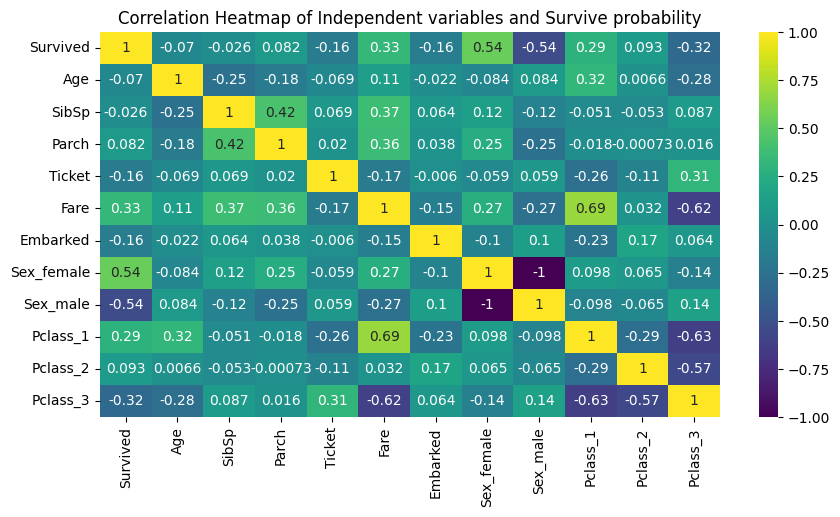

In [12]:
corr_matrix = df.drop(columns=['PassengerId'], errors='ignore').corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", center=0)
plt.title("Correlation Heatmap of Independent variables and Survive probability")
plt.show()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Ticket       891 non-null    int64  
 6   Fare         891 non-null    int64  
 7   Embarked     891 non-null    int64  
 8   Sex_female   891 non-null    bool   
 9   Sex_male     891 non-null    bool   
 10  Pclass_1     891 non-null    bool   
 11  Pclass_2     891 non-null    bool   
 12  Pclass_3     891 non-null    bool   
dtypes: bool(5), float64(1), int64(7)
memory usage: 60.2 KB


In [14]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.23, stratify = y, random_state = 0)

In [15]:

model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [16]:

model.score(x_test, y_test)

0.8097560975609757

## Test File

In [17]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [18]:

from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy = 'mean')
dt ['Age'] = mean_imputer.fit_transform(dt[['Age']])
#Check age
dt.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [19]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()

dt = dt[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']]
dt = pd.get_dummies(dt, columns = ['Sex', 'Pclass'])

dt['Ticket'] = label_encoder.fit_transform(dt['Ticket'])
dt['Fare'] = label_encoder.fit_transform(dt['Fare'])
dt['Parch'] = label_encoder.fit_transform(dt['Parch'])
dt['Embarked'] = label_encoder.fit_transform(dt['Embarked'])
dt['SibSp'] = label_encoder.fit_transform(dt['SibSp'])

#drop cabin, name
dt.dropna(inplace = True)
dt.head()


,PassengerId,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,34.5,0,0,152,24,1,False,True,False,False,True
1,893,47.0,1,0,221,5,2,True,False,False,False,True
2,894,62.0,0,0,73,41,1,False,True,False,True,False
3,895,27.0,0,0,147,34,2,False,True,False,False,True
4,896,22.0,1,1,138,46,2,True,False,False,False,True


In [20]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Ticket       418 non-null    int64  
 5   Fare         418 non-null    int64  
 6   Embarked     418 non-null    int64  
 7   Sex_female   418 non-null    bool   
 8   Sex_male     418 non-null    bool   
 9   Pclass_1     418 non-null    bool   
 10  Pclass_2     418 non-null    bool   
 11  Pclass_3     418 non-null    bool   
dtypes: bool(5), float64(1), int64(6)
memory usage: 25.0 KB


In [21]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Ticket       418 non-null    int64  
 5   Fare         418 non-null    int64  
 6   Embarked     418 non-null    int64  
 7   Sex_female   418 non-null    bool   
 8   Sex_male     418 non-null    bool   
 9   Pclass_1     418 non-null    bool   
 10  Pclass_2     418 non-null    bool   
 11  Pclass_3     418 non-null    bool   
dtypes: bool(5), float64(1), int64(6)
memory usage: 25.0 KB


## Sample Submission File

In [22]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [23]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


## Generate Results

In [24]:
id = sf.pop('PassengerId')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerID': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
